<h1 style="text-align:center;">Churn Prediction Model</h1>


<img src=https://fs.hubspotusercontent00.net/hubfs/9057203/Imported_Blog_Media/GettyImages-1030850238-01.jpg width="100%" alt="Churn Prediction">

# CASE

Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. 
A high churn means that higher number of customers no longer want to purchase goods and services from the business. 
Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.
Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.

## Problem Statement 

The goal is to build a customer churn prediction model to identify which customers are likely to stop purchasing from a business. Churn prediction is essential for improving customer retention

## DATASET features Description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age -Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count-Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon-No. of Contacts in the last 12 months
- Credit_Limit-Credit Limit on the Credit Card
- Total_Revolving_Bal-Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy-Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1- Open to Buy Credit Line (Average of last 12 months)
- Total_Trans_Amt-Total Transaction Amount (Last 12 months)
- Total_Trans_Ct- Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1-Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio-Average Card Utilization Ratio


In [1]:
# Importing all the libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset

Churn = pd.read_csv("C:/Users/Win11/Documents/My learning/IIT_Madras/Final Project/BankChurners.csv")

In [3]:
# Identifying columns
Churn.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
# Datframe

Churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Describing the Dataset

Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
# Describing and Transposing to understand the stattiscs of the attributes present in the data

Churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
# Identifying the Number of rows and columns

Churn.shape

(10127, 23)

In [8]:
# Identifying the Unique Columns

Churn.columns.unique()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Data Preprocessing

In [9]:
#identifying missing values

Churn.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [10]:
#checking duplicates

Churn.duplicated().sum()

0

In [11]:
print(Churn.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [12]:
# Counting the Attrition_Flag 

Churn.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

## Feature Engineering

In [13]:
# Extracting new feature from income_category, Categorising within the range 

income_mapping = {
    'Less than $40K': 20000,
    '$40K - $60K': 50000,
    '$60K - $80K': 70000,
    '$80K - $120K': 100000,
    '$120K +': 140000,
    'Unknown': None  # None will leave missing values for unknown income
}

# Using the map() function to create a new 'Income' column based on the mapping
Churn['Income'] = Churn['Income_Category'].map(income_mapping)

print(Churn[['Income_Category', 'Income']].head())

# filling the missing values for 'Unknown' category with the median income
Churn['Income'].fillna(Churn['Income'].median(), inplace=True)


  Income_Category    Income
0     $60K - $80K   70000.0
1  Less than $40K   20000.0
2    $80K - $120K  100000.0
3  Less than $40K   20000.0
4     $60K - $80K   70000.0


In [14]:
# Binning Customer_Age into age categories

# Define age bins and labels
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Bining the 'Customer_Age' into categories
Churn['Age_Category'] = pd.cut(Churn['Customer_Age'], bins=bins, labels=labels, right=False)

# Calculating the average age for each age category
average_age_by_category = Churn.groupby('Age_Category')['Customer_Age'].mean().to_dict()

# Replacing Age_Category with average age
Churn['Age_Category_Avg'] = Churn['Age_Category'].map(average_age_by_category)

# Updating the Existing Dataframes
print("Updated DataFrame with Average Age in Age_Category:")



Updated DataFrame with Average Age in Age_Category:


In [15]:
# Creating new feature for Credit Utilization Ratio
Churn['Utilization_Ratio'] = Churn['Total_Revolving_Bal'] / Churn['Credit_Limit']


In [16]:
# Creating Aggregated Features
Churn['Engagement_Score'] = Churn['Total_Relationship_Count'] - Churn['Months_Inactive_12_mon']


array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Utilization_Ratio'}>]], dtype=object)

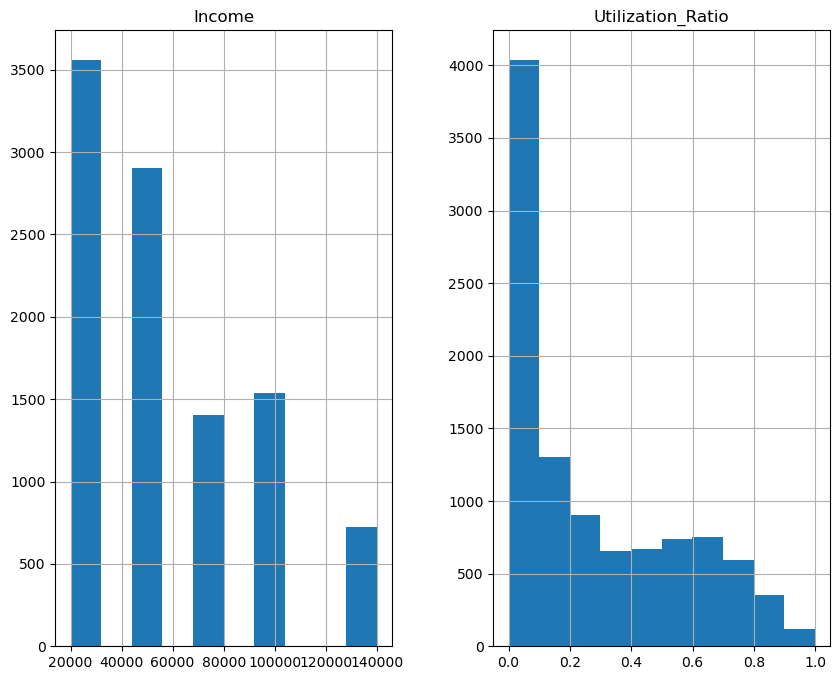

In [17]:
# Visualizing the New Features
Churn[['Income', 'Utilization_Ratio', 'Age_Category']].hist(figsize=(10, 8))

In [18]:
# Replacing the categorical values in 'Attrition_Flag' column
Churn['Attrition_Flag'] = Churn['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

In [19]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoding
label_encoder = LabelEncoder()

Churn['Gender'] = label_encoder.fit_transform(Churn['Gender']) 

# Applying Label Encoding to the 'Education_Level' column
Churn['Education_Level'] = label_encoder.fit_transform(Churn['Education_Level']) 

# Applying Label Encoding to the 'Marital_Status' column
Churn['Marital_Status'] = label_encoder.fit_transform(Churn['Marital_Status'])

# Applying Label Encoding to the 'Card_Category' column
Churn['Card_Category'] = label_encoder.fit_transform(Churn['Card_Category'])

# updated DataFrame
print(Churn.head())

# Display the mapping of categories to numeric values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
Churn.head()

   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       1                3   
1  818770008               0            49       0                5   
2  713982108               0            51       1                3   
3  769911858               0            40       0                4   
4  709106358               0            40       1                3   

   Education_Level  Marital_Status Income_Category  Card_Category  \
0                3               1     $60K - $80K              0   
1                2               2  Less than $40K              0   
2                2               1    $80K - $120K              0   
3                3               3  Less than $40K              0   
4                5               1     $60K - $80K              0   

   Months_on_book  ...  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              39  ...              42                1.625   
1              44  ...          

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Income,Age_Category,Age_Category_Avg,Utilization_Ratio,Engagement_Score
0,768805383,0,45,1,3,3,1,$60K - $80K,0,39,...,42,1.625,0.061,0.000093,0.99991,70000.0,41-50,44.736681,0.061224,4
1,818770008,0,49,0,5,2,2,Less than $40K,0,44,...,33,3.714,0.105,0.000057,0.99994,20000.0,41-50,44.736681,0.104651,5
2,713982108,0,51,1,3,2,1,$80K - $120K,0,36,...,20,2.333,0.000,0.000021,0.99998,100000.0,51-60,53.581054,0.000000,3
3,769911858,0,40,0,4,3,3,Less than $40K,0,34,...,20,2.333,0.760,0.000134,0.99987,20000.0,41-50,44.736681,0.759734,-1
4,709106358,0,40,1,3,5,1,$60K - $80K,0,21,...,28,2.500,0.000,0.000022,0.99998,70000.0,41-50,44.736681,0.000000,4


In [20]:
# Droping the specified columns which is irrlevant for analysis
columns_to_drop = ['Income_Category', 'CLIENTNUM','Age_Category','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
Ch = Churn.drop(columns=columns_to_drop)

# Displaying the updated DataFrame
print("Updated DataFrame:")
Ch.head()

Updated DataFrame:


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income,Age_Category_Avg,Utilization_Ratio,Engagement_Score
0,0,45,1,3,3,1,0,39,5,1,...,11914.0,1.335,1144,42,1.625,0.061,70000.0,44.736681,0.061224,4
1,0,49,0,5,2,2,0,44,6,1,...,7392.0,1.541,1291,33,3.714,0.105,20000.0,44.736681,0.104651,5
2,0,51,1,3,2,1,0,36,4,1,...,3418.0,2.594,1887,20,2.333,0.000,100000.0,53.581054,0.000000,3
3,0,40,0,4,3,3,0,34,3,4,...,796.0,1.405,1171,20,2.333,0.760,20000.0,44.736681,0.759734,-1
4,0,40,1,3,5,1,0,21,5,1,...,4716.0,2.175,816,28,2.500,0.000,70000.0,44.736681,0.000000,4


# Exploratory Data Analysis

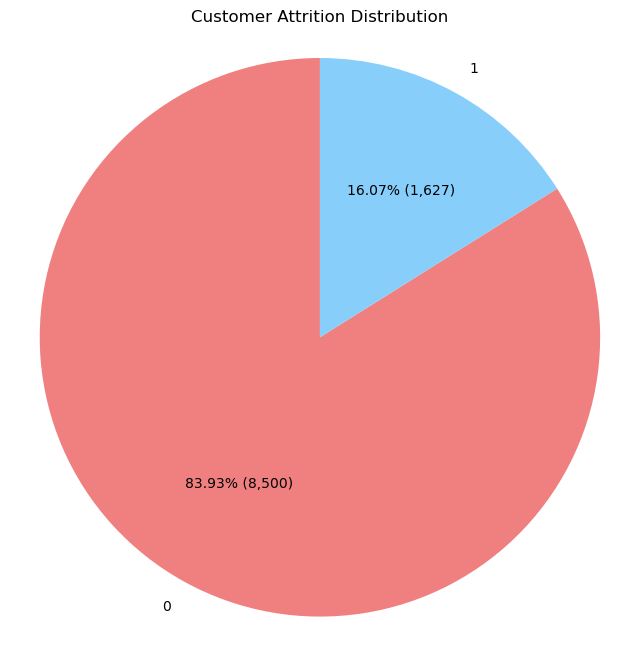

In [21]:
# Customer Attrition Distribution 

attrition_counts = Ch['Attrition_Flag'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, (p/100)*attrition_counts.sum()), startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Customer Attrition Distribution')
plt.axis('equal')
plt.show()

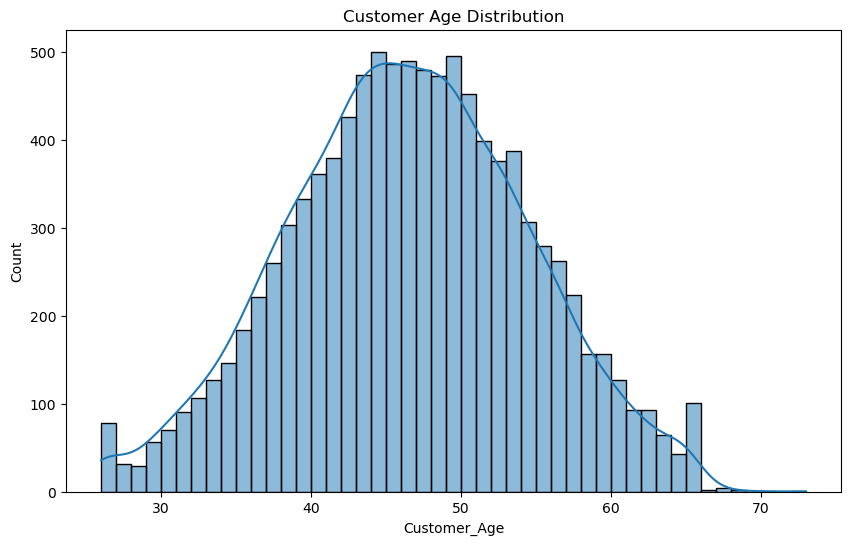

In [22]:
# Customer Age Distribution

plt.figure(figsize=(10, 6))
sns.histplot(Ch['Customer_Age'], kde=True)
plt.title('Customer Age Distribution')
plt.show()

In [23]:
# Correlation Analysis

Ch.corr()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income,Utilization_Ratio,Engagement_Score
Attrition_Flag,1.000000,0.018203,-0.037272,0.018991,0.005551,0.018597,-0.006038,0.013687,-0.150005,0.152449,...,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410,-0.009902,-0.178406,-0.208509
Customer_Age,0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.020131,0.788912,-0.010931,0.054361,...,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.028917,0.007115,-0.038731
Gender,-0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,0.079203,-0.006728,0.003157,-0.011163,...,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851,0.726502,-0.257853,0.008717
Dependent_count,0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,0.021674,-0.103062,-0.039076,-0.010768,...,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.063985,-0.037122,-0.026846
Education_Level,0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.007212,-0.004953,0.009636,-0.008077,...,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477,0.001030,0.006487,0.012461
Marital_Status,0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.035947,-0.012084,-0.021393,0.001709,...,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451,-0.007987,-0.027440,-0.018835
Card_Category,-0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,1.000000,-0.014749,-0.073770,-0.016816,...,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089,0.078384,-0.205095,-0.052592
Months_on_book,0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.014749,1.000000,-0.009203,0.074164,...,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.024031,-0.007539,-0.048061
Total_Relationship_Count,-0.150005,-0.010931,0.003157,-0.039076,0.009636,-0.021393,-0.073770,-0.009203,1.000000,-0.003675,...,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.004327,0.067659,0.838976
Months_Inactive_12_mon,0.152449,0.054361,-0.011163,-0.010768,-0.008077,0.001709,-0.016816,0.074164,-0.003675,1.000000,...,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,-0.013061,-0.007497,-0.547249


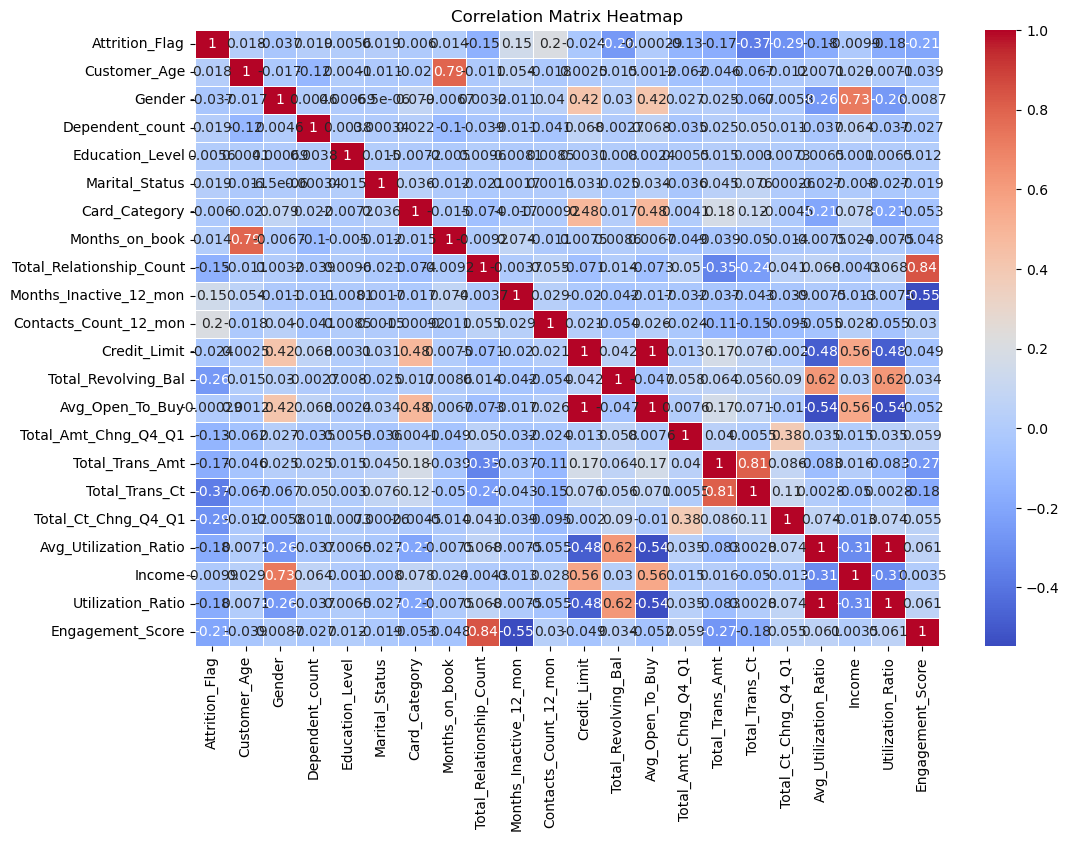

In [24]:
# Correlation between Multicollinearity

corr_matrix = Ch.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
# Displaying the correlation with the target variable

correlation_matrix = Ch.corr()

print(correlation_matrix['Attrition_Flag'].sort_values(ascending=False))

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Marital_Status              0.018597
Customer_Age                0.018203
Months_on_book              0.013687
Education_Level             0.005551
Avg_Open_To_Buy            -0.000285
Card_Category              -0.006038
Income                     -0.009902
Credit_Limit               -0.023873
Gender                     -0.037272
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Utilization_Ratio          -0.178406
Avg_Utilization_Ratio      -0.178410
Engagement_Score           -0.208509
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64


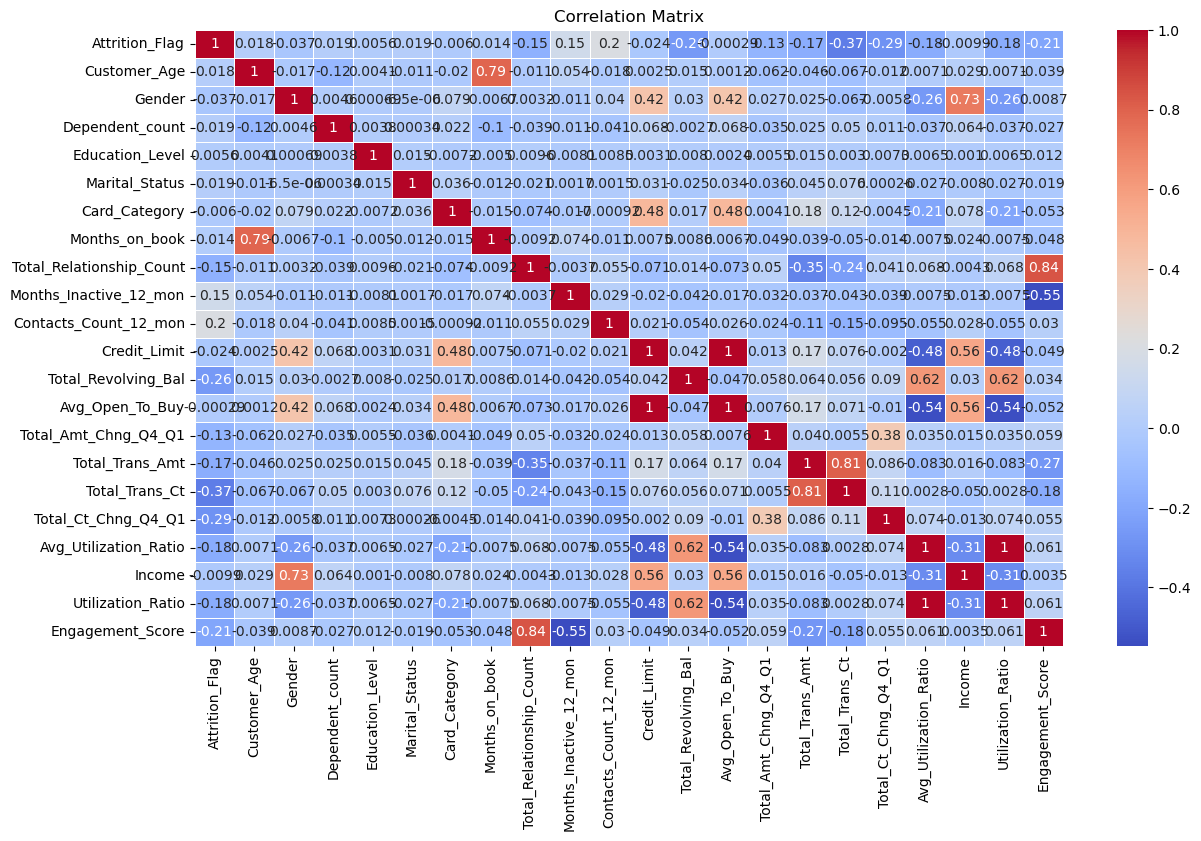

In [26]:
# Correlation heatmap of numerical variables

plt.figure(figsize=(14, 8))
sns.heatmap(Ch.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

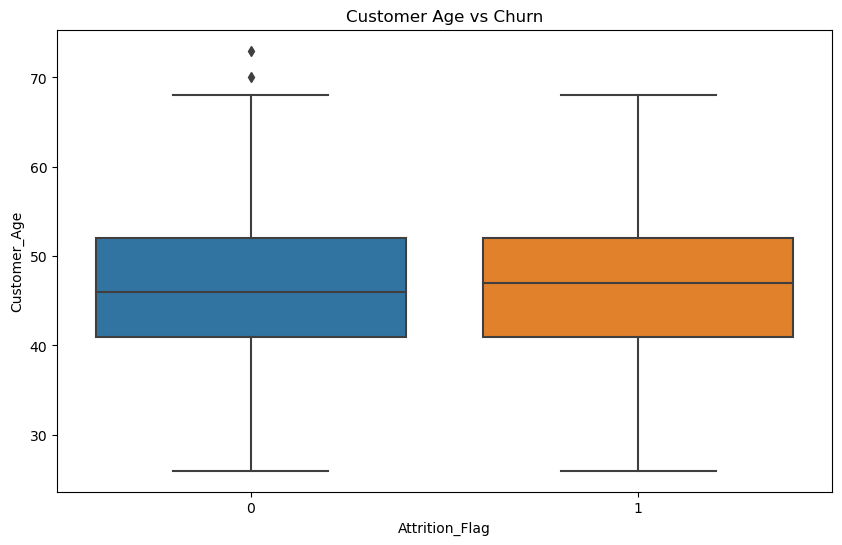

In [27]:
# Relationship between Age and Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=Ch)
plt.title('Customer Age vs Churn')
plt.show()

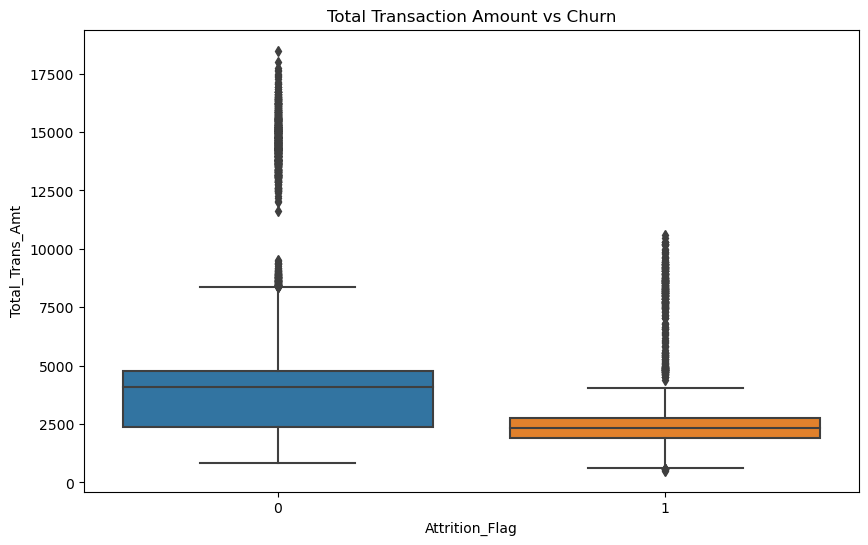

In [28]:
# Analyzing the relationship between Total_Trans_Amt and Churn

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=Ch)
plt.title('Total Transaction Amount vs Churn')
plt.show()

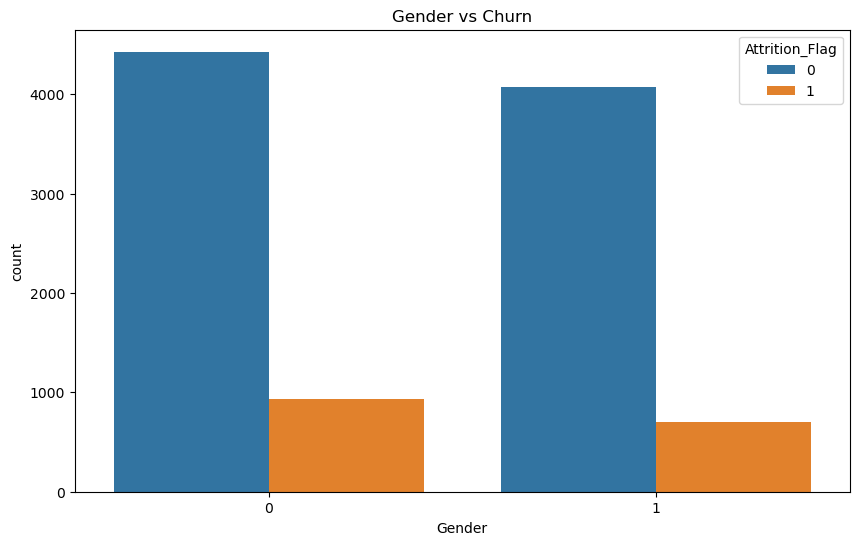

In [29]:
# Distribution of categorical features (e.g., Gender, Card_Category)

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=Ch)
plt.title('Gender vs Churn')
plt.show()

In [30]:
# Attrition count in Education_Level and which category of gender is affected the most ? 

# Filtering for churned customers (where Attrition_Flag == 1)
churned_customers = Ch[Ch['Attrition_Flag'] == 1]

# Group the data by Education_Level and Gender to count the number of churns
churn_count_by_edu_gender = churned_customers.groupby(['Education_Level', 'Gender']).size().reset_index(name='Churn_Count')

# Find the total churn count by Education Level
total_churn_by_edu = churn_count_by_edu_gender.groupby('Education_Level')['Churn_Count'].sum().reset_index(name='Total_Churn')

# Finding the gender that is most affected in each education level
most_affected_gender = churn_count_by_edu_gender.loc[churn_count_by_edu_gender.groupby('Education_Level')['Churn_Count'].idxmax()]

# Display the output
print("Total Churn Count by Education Level:")
print(total_churn_by_edu)

print("\nGender most affected by churn in each Education Level:")
print(most_affected_gender)


Total Churn Count by Education Level:
   Education_Level  Total_Churn
0                0          154
1                1           95
2                2          487
3                3          306
4                4           92
5                5          237
6                6          256

Gender most affected by churn in each Education Level:
    Education_Level  Gender  Churn_Count
0                 0       0           79
2                 1       0           64
4                 2       0          293
6                 3       0          172
9                 4       1           48
10                5       0          127
12                6       0          151


In [31]:
# attrition count in Marital_Status and category of gender that is affected the most 

# Filtering for churned customers (where Attrition_Flag == 'Attrited Customer')
churned_customers = Ch[Ch['Attrition_Flag'] == 1]

# Group the data by Marital_Status and Gender to count the number of churns
churn_count_by_marital_gender = churned_customers.groupby(['Marital_Status', 'Gender']).size().reset_index(name='Churn_Count')

# Find the total churn count by Marital_Status
total_churn_by_marital = churn_count_by_marital_gender.groupby('Marital_Status')['Churn_Count'].sum().reset_index(name='Total_Churn')

# Finding the gender that is most affected in each marital status category
most_affected_gender = churn_count_by_marital_gender.loc[churn_count_by_marital_gender.groupby('Marital_Status')['Churn_Count'].idxmax()]

# Display the results
print("Total Churn Count by Marital Status:")
print(total_churn_by_marital)

print("\nGender most affected by churn in each Marital Status category:")
print(most_affected_gender)


Total Churn Count by Marital Status:
   Marital_Status  Total_Churn
0               0          121
1               1          709
2               2          668
3               3          129

Gender most affected by churn in each Marital Status category:
   Marital_Status  Gender  Churn_Count
0               0       0           68
2               1       0          412
4               2       0          381
6               3       0           69


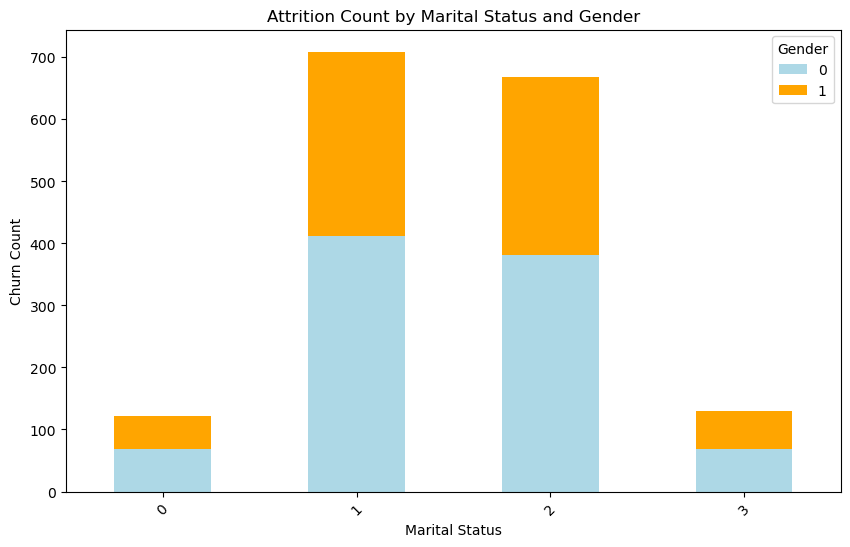

In [32]:
pivot_marital = churn_count_by_marital_gender.pivot(index='Marital_Status', columns='Gender', values='Churn_Count').fillna(0)

# Plotting the stacked bar plot
pivot_marital.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])

plt.title('Attrition Count by Marital Status and Gender')
plt.ylabel('Churn Count')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

In [33]:
#Average Income by gender

average_income_by_gender = Ch.groupby('Gender')['Income'].mean().reset_index(name='Average_Income')

# Display the results
print("Average Income by Gender:")
print(average_income_by_gender)

Average Income by Gender:
   Gender  Average_Income
0       0    31612.541993
1       1    83950.513735


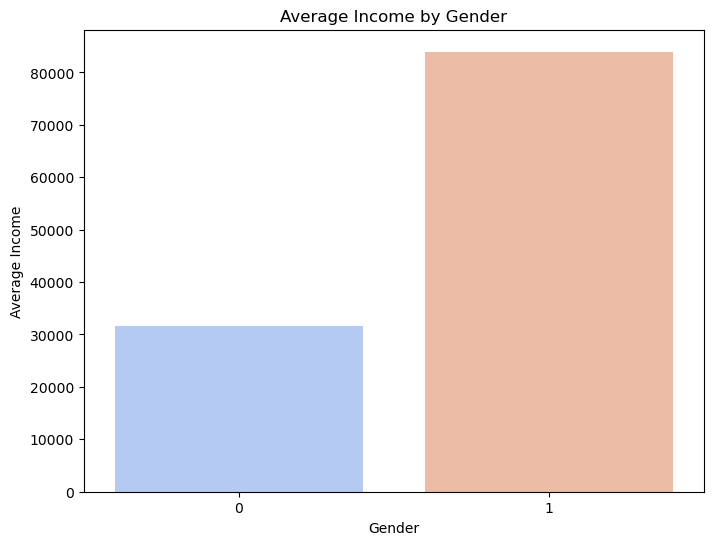

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Average_Income', data=average_income_by_gender, palette='coolwarm')

plt.title('Average Income by Gender')
plt.xlabel('Gender')  # Ensure xlabel is correct
plt.ylabel('Average Income')
plt.show()

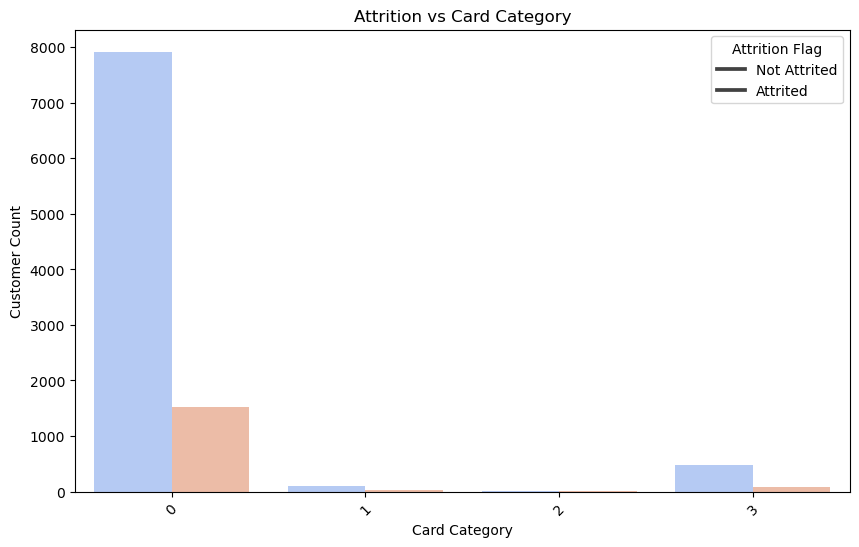

In [35]:
#Product that Customer are dumping the most

attrition_vs_card = Ch.groupby(['Attrition_Flag', 'Card_Category']).size().reset_index(name='Count')

attrition_pivot = attrition_vs_card.pivot(index='Card_Category', columns='Attrition_Flag', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.barplot(x='Card_Category', y='Count', hue='Attrition_Flag', data=attrition_vs_card, palette='coolwarm')

plt.title('Attrition vs Card Category')
plt.ylabel('Customer Count')
plt.xlabel('Card Category')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', loc='upper right', labels=['Not Attrited', 'Attrited'])
plt.show()

In [36]:
#What is the highest relationship period with bank the customers have stayed

#Finding the maximum value in the 'Months_on_book' column

max_relationship_period = Ch['Months_on_book'].max()

#Filtering customers with the highest relationship period
customers_with_max_period = Ch[Ch['Months_on_book'] == max_relationship_period]
print(f"The highest relationship period with the bank is {max_relationship_period} months.")
print("Customers with the longest relationship period:")
print(customers_with_max_period)

The highest relationship period with the bank is 56 months.
Customers with the longest relationship period:
      Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
18                 0            61       1                1                3   
27                 0            63       1                1                6   
39                 1            66       0                0                1   
108                0            62       0                1                6   
151                0            68       1                1                2   
...              ...           ...     ...              ...              ...   
7859               0            63       0                0                5   
8602               0            61       0                1                3   
8634               0            62       1                2                2   
8955               0            62       1                0                2   
9129        

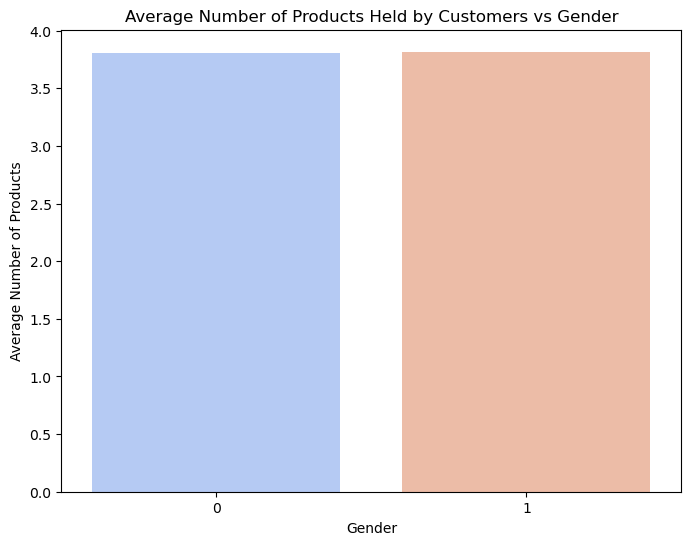

In [37]:
#Total no:of Products held by cutomer vs gender

#Grouping by Gender and calculate the average or total number of products held
products_vs_gender = Ch.groupby('Gender')['Total_Relationship_Count'].mean().reset_index()

#Plot the data using a bar plot to compare the total products held by each gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total_Relationship_Count', data=products_vs_gender, palette='coolwarm')

plt.title('Average Number of Products Held by Customers vs Gender')
plt.ylabel('Average Number of Products')
plt.xlabel('Gender')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

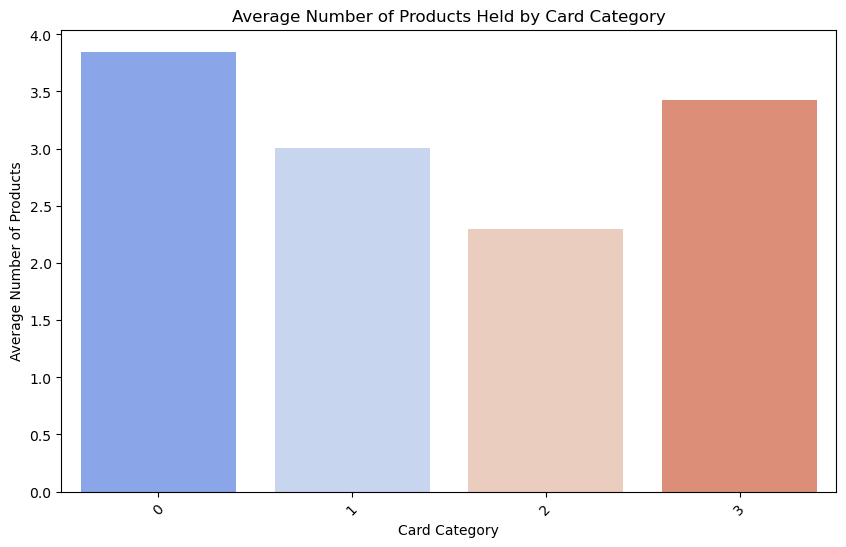

In [38]:
#Card Category and the count of Product held by customers

products_by_card_category = Ch.groupby('Card_Category')['Total_Relationship_Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Card_Category', y='Total_Relationship_Count', data=products_by_card_category, palette='coolwarm')
plt.title('Average Number of Products Held by Card Category')
plt.ylabel('Average Number of Products')
plt.xlabel('Card Category')
plt.xticks(rotation=45)

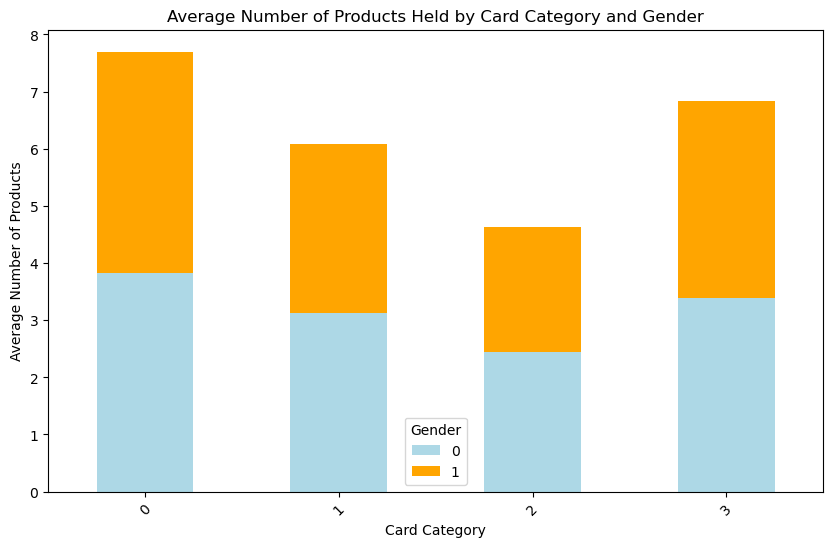

In [39]:
#To analyze Card Category and the count of products held by customers, while also determining which gender prefers which product

pivot_card_gender = Ch.pivot_table(index='Card_Category', columns='Gender', values='Total_Relationship_Count', aggfunc='mean').fillna(0)
pivot_card_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])
plt.title('Average Number of Products Held by Card Category and Gender')
plt.ylabel('Average Number of Products')
plt.xlabel('Card Category')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Average Credit Limit by Average Age Category:
Age_Category_Avg
44.736680552510414    9178.870949
53.581054036024014    8811.622181
35.841933731667574    7790.933677
62.27735849056604     6738.987925
27.323076923076922    6211.425128
71.5                  3860.500000
Name: Credit_Limit, dtype: float64


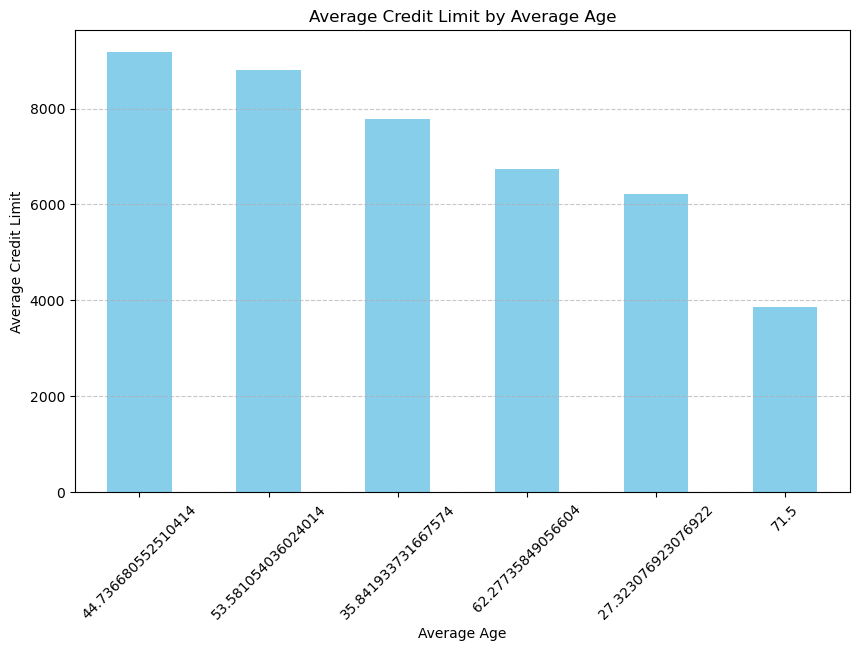

In [40]:
# Average Credit Limit by Average Age (Bar Plot)

average_credit_limit_by_age_avg = Churn.groupby('Age_Category_Avg')['Credit_Limit'].mean().sort_values(ascending=False)

print("Average Credit Limit by Average Age Category:")
print(average_credit_limit_by_age_avg)

# To visualize this data
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
average_credit_limit_by_age_avg.plot(kind='bar', color='skyblue')
plt.title('Average Credit Limit by Average Age')
plt.xlabel('Average Age')
plt.ylabel('Average Credit Limit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

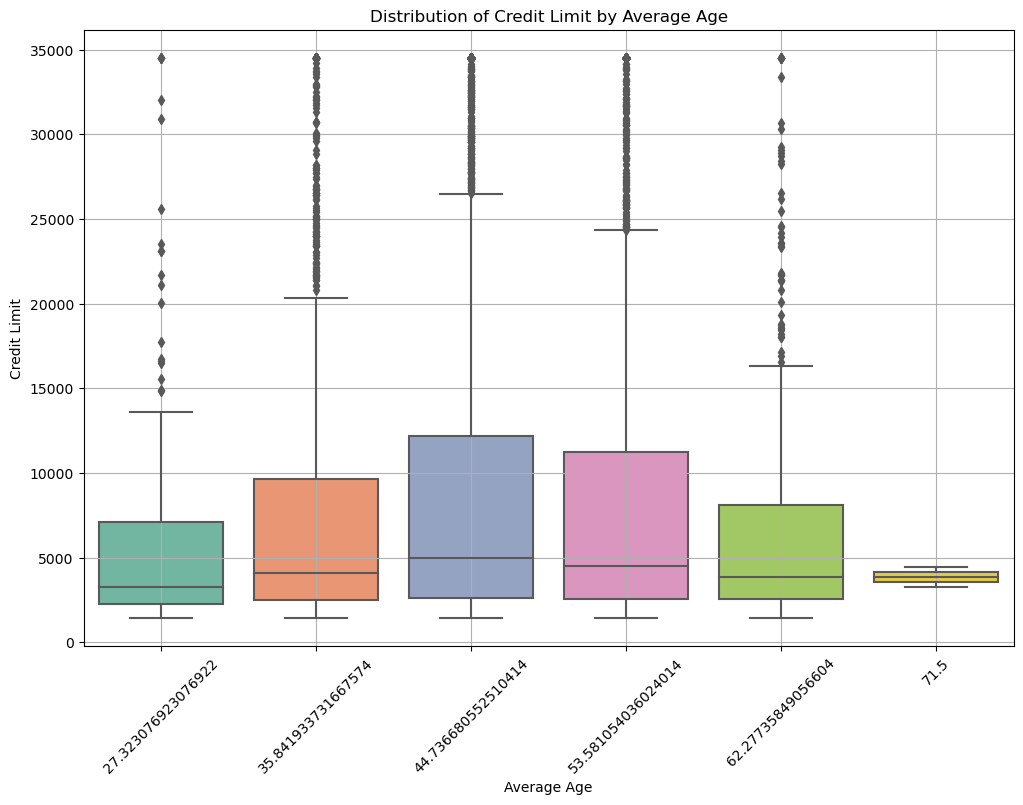

Summary Statistics of Credit Limit by Average Age:
                     count         mean          std     min      25%     50%  \
Age_Category_Avg                                                                
27.323076923076922   195.0  6211.425128  6989.609221  1438.3  2251.00  3261.0   
35.841933731667574  1841.0  7790.933677  8361.924078  1438.3  2498.00  4116.0   
44.736680552510414  4561.0  9178.870949  9409.481653  1438.3  2598.00  4983.0   
53.581054036024014  2998.0  8811.622181  9389.529117  1438.3  2540.25  4490.0   
62.27735849056604    530.0  6738.987925  6808.450774  1438.3  2563.75  3889.0   
71.5                   2.0  3860.500000   860.548953  3252.0  3556.25  3860.5   

                         75%      max  
Age_Category_Avg                       
27.323076923076922   7116.00  34516.0  
35.841933731667574   9642.00  34516.0  
44.736680552510414  12165.00  34516.0  
53.581054036024014  11275.50  34516.0  
62.27735849056604    8140.25  34516.0  
71.5                

In [41]:
# Distribution of Credit Limits (Box Plot)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Category_Avg', y='Credit_Limit', data=Churn, palette='Set2')
plt.title('Distribution of Credit Limit by Average Age')
plt.xlabel('Average Age')
plt.ylabel('Credit Limit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Summary statistics for Credit Limit by Average Age
credit_limit_summary_by_age_avg = Churn.groupby('Age_Category_Avg')['Credit_Limit'].describe()
print("Summary Statistics of Credit Limit by Average Age:")
print(credit_limit_summary_by_age_avg)


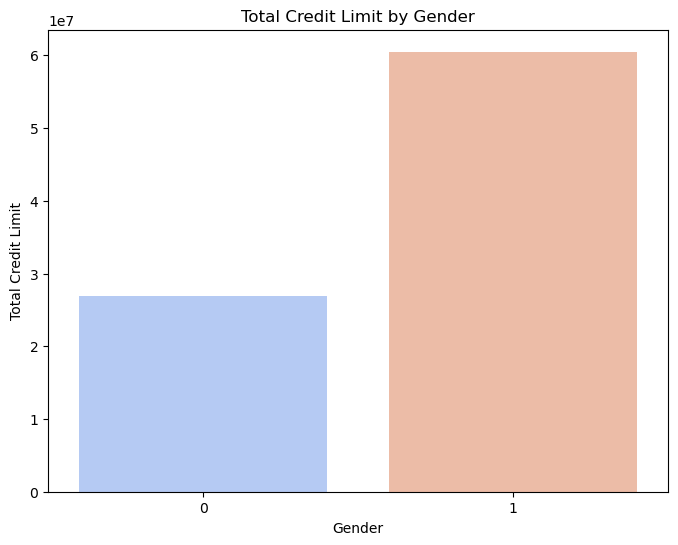

In [42]:
#Relationship between Credit Limit and Gender

credit_limit_total_by_gender = Ch.groupby('Gender')['Credit_Limit'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Credit_Limit', data=credit_limit_total_by_gender, palette='coolwarm')

plt.title('Total Credit Limit by Gender')
plt.ylabel('Total Credit Limit')
plt.xlabel('Gender')
plt.show()

In [43]:
#Customer in the last month who were inactive

#Filtering customers who were inactive in the last month (Months_Inactive_12_mon == 1)
inactive_last_month = Ch[Ch['Months_Inactive_12_mon'] == 1]

print("Customers inactive in the last month:")
print(inactive_last_month)


Customers inactive in the last month:
       Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   0            45       1                3                3   
1                   0            49       0                5                2   
2                   0            51       1                3                2   
4                   0            40       1                3                5   
5                   0            44       1                2                2   
...               ...           ...     ...              ...              ...   
10095               0            46       1                3                6   
10107               1            61       1                0                2   
10112               1            33       1                2                0   
10114               0            29       1                0                2   
10121               0            56       0                1           

In [44]:
# Count the number of customers who were inactive in the last month

num_inactive_last_month = inactive_last_month.shape[0]

print(f"Number of customers inactive in the last month: {num_inactive_last_month}")


Number of customers inactive in the last month: 2233


In [45]:
import pandas as pd

# Example DataFrame (assuming Ch is your DataFrame)
# Ch = pd.read_csv('your_data.csv')  # Uncomment and use if reading from a file

# Define the criteria for purchasing
min_credit_limit = 10000
min_age = 25
max_age = 60
eligible_income_categories = ['70000.0', '100000.0', '140000.0']

# Convert data types if necessary
Ch['Credit_Limit'] = pd.to_numeric(Ch['Credit_Limit'], errors='coerce')
Ch['Income'] = Ch['Income'].astype(str)  # Ensure Income is treated as a string

# Filter out ineligible customers
ineligible_customers = Ch[
    (Ch['Credit_Limit'] < min_credit_limit) |  # Credit limit less than $10,000
    (Ch['Customer_Age'] < min_age) |  # Age below 25
    (Ch['Customer_Age'] > max_age) |  # Age above 60
    (~Ch['Income'].isin(eligible_income_categories))  # Income category not in eligible list
]

print("Customers who do not meet the criteria to buy a product:")
print(ineligible_customers)

# Count the number of ineligible customers
num_ineligible_customers = ineligible_customers.shape[0]
print(f"Number of customers who do not meet the criteria: {num_ineligible_customers}")


Customers who do not meet the criteria to buy a product:
       Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
1                   0            49       0                5                2   
2                   0            51       1                3                2   
3                   0            40       0                4                3   
4                   0            40       1                3                5   
5                   0            44       1                2                2   
...               ...           ...     ...              ...              ...   
10122               0            50       1                2                2   
10123               1            41       1                2                6   
10124               1            44       0                1                3   
10125               1            30       1                2                2   
10126               1            43       0         

## Model Building Logistic Regression Model 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
Ch.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income', 'Age_Category_Avg', 'Utilization_Ratio', 'Engagement_Score'],
      dtype='object')

In [59]:
features = [
    'Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status', 
    'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio', 'Income', 'Age_Category_Avg', 'Utilization_Ratio', 
    'Engagement_Score'
]
X = Ch[features]
y = Ch['Attrition_Flag']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Train and Evaluate the Model 

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix:
[[2463   80]
 [ 223  273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2543
           1       0.77      0.55      0.64       496

    accuracy                           0.90      3039
   macro avg       0.85      0.76      0.79      3039
weighted avg       0.89      0.90      0.89      3039

Accuracy Score: 0.9002961500493584


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# Hyperparameter grid for Random Forest

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],        # Maximum depth of the tree
    'max_features': ['auto', 'sqrt'],           # Number of features to consider at every split
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}


In [63]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [53]:
# Predict using the best parameters
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Confusion Matrix:
[[2510   33]
 [  84  412]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2543
           1       0.93      0.83      0.88       496

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039

Accuracy: 0.9615004935834156


## Feature Selection

In [67]:
# feature importances
importances = best_rf.feature_importances_

# Creating a DataFrame to hold feature names and their importance scores
features = X.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("\nFeature Importances:")
print(importance_df)



Feature Importances:
                     Feature  Importance
13           Total_Trans_Amt    0.185614
14            Total_Trans_Ct    0.173130
15       Total_Ct_Chng_Q4_Q1    0.100919
10       Total_Revolving_Bal    0.091041
12      Total_Amt_Chng_Q4_Q1    0.055658
19         Utilization_Ratio    0.049153
6   Total_Relationship_Count    0.046248
20          Engagement_Score    0.045183
16     Avg_Utilization_Ratio    0.045079
9               Credit_Limit    0.029800
0               Customer_Age    0.029036
11           Avg_Open_To_Buy    0.027231
8      Contacts_Count_12_mon    0.024457
5             Months_on_book    0.022603
7     Months_Inactive_12_mon    0.020577
18          Age_Category_Avg    0.014128
1            Dependent_count    0.010827
2            Education_Level    0.010148
17                    Income    0.009496
3             Marital_Status    0.007904
4              Card_Category    0.001770


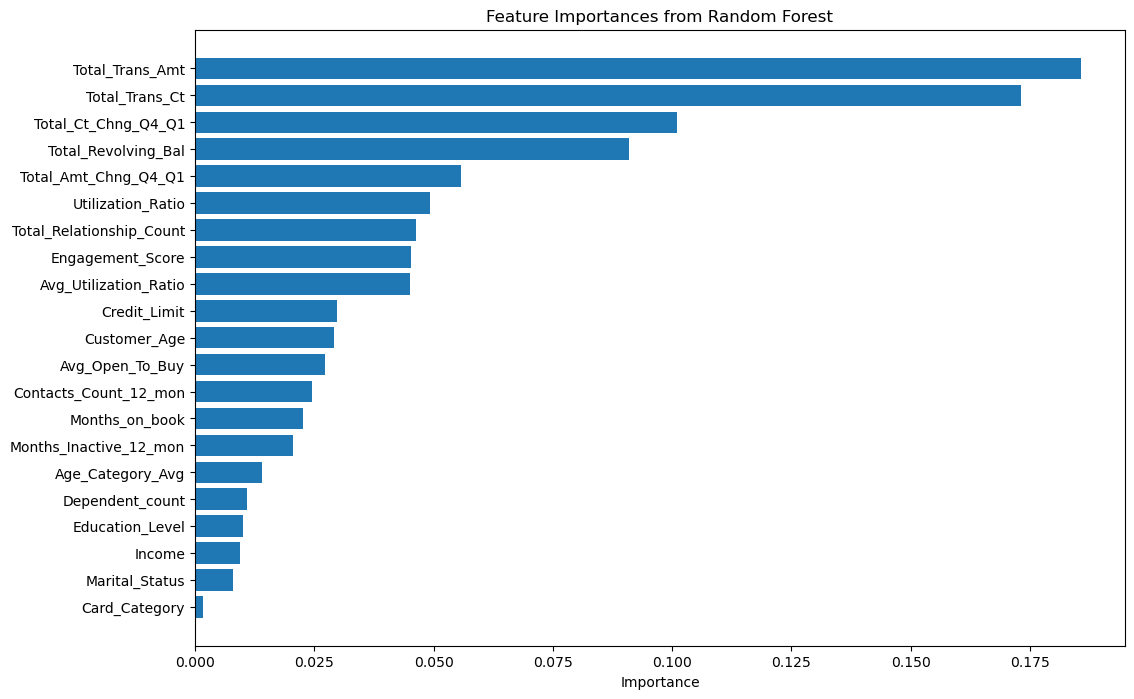

In [68]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()

# <h2 style="display: inline-block;">Insights</h2>
<img src="https://www.sellerapp.com/blog/wp-content/uploads/2017/06/insights-from-amazon-customers.jpg" alt="Insights Image" style="display: inline-block; width: 200px; vertical-align: middle; margin-left: 20px;">


## Customer Age 
Insights can be drawn by age categories to see if younger or older customers are more likely to churn

## Gender Impact 
You may analyze whether males or females are more likely to churn

## Dependent Count
The number of dependents could play a role in customer retention—customers with more dependents may have different usage patterns

## Credit Limit and Utilization
Higher credit limits or utilization ratios might be indicators of financial health or stress, which can correlate with churn

## Transaction Amount and Frequency
Customers with a decline in transactions or less frequent engagement with the business may be more likely to churn

# <h2 style="display: inline-block;">Recommendations</h2>
<img src="https://cdn-icons-png.flaticon.com/512/12639/12639228.png" alt="Churn Rate Icon" style="display: inline-block; width: 200px; vertical-align: middle; margin-left: 20px;">


## Targeted Retention Strategies
Focus on customers with declining transaction amounts or counts. Implement loyalty programs or personalized offers to encourage continued engagement

## Age-Specific Offers
If certain age groups show higher churn rates, tailor marketing strategies to address their needs (e.g., financial advice for younger customers, travel perks for older ones)

## Credit Utilization Monitoring
Customers with high credit utilization or low credit limits might be financially stressed. Offering credit counseling or financial products could help retain these customers

## Improving Customer Service
Look into customers with a high number of contacts or complaints. Enhancing customer service for these users could reduce churn

## Loyalty Programs for Dependents
If customers with dependents are at higher risk of churn, providing family-centric offers (like additional cards for family members) might increase retention